# Business Understanding and Problem Framing


- Farming holds the biggest stakes in the global market.
- There are approximately 570 million farms worldwide, varying significantly in size and productivity.
- Farm size matters for economic development, poverty alleviation, global food production, and environmental impacts.
- Over the past few decades, global crop production has seen significant changes.
- Environmental changes and unorthodox changes in the climate has affected the global farming.
- There are facilities freely available for farmers to get best assitance but lack of awareness among the farmers is the biggest issues
- we are countering this issue by creating a Machine Learning Model which predicts and Recommend the best crop suitable to grow based on the previously available trained data.

# Data Collection and Preprocessing 

In [1]:
#importing warnings library to avoid warnings
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [3]:
import pandas as pd

data1 = pd.read_csv('datasets/Crop_data1.csv')
data1.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data2 = pd.read_csv('datasets/Crop_data2.csv')
data2.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
#sanity checkp
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1796 non-null   int64  
 1   P            1796 non-null   int64  
 2   K            1796 non-null   int64  
 3   temperature  1796 non-null   float64
 4   humidity     1796 non-null   float64
 5   ph           1796 non-null   float64
 6   rainfall     1796 non-null   float64
 7   label        1796 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 112.4+ KB


In [11]:
#calculating shape of columns
data1.shape

(2200, 8)

In [13]:
data2.shape

(1796, 8)

In [15]:
#finding missing value
data1.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [17]:
data2.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [19]:
#finding duplicates
data1.duplicated().sum()

0

In [21]:
data2.duplicated().sum()

103

In [23]:
data2.drop_duplicates(subset = ['N','P','K','temperature','humidity','ph','rainfall'],keep = 'first',inplace = True)
data2.duplicated().sum()

0

In [25]:
#identifiying Garbage values
for i in data1.select_dtypes(include = 'object').columns:
    print(data1[i].value_counts())
    print("***"*10)

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64
******************************


In [27]:
for i in data2.select_dtypes(include = 'object').columns:
    print(data2[i].value_counts())
    print("***"*10)

label
rice          139
Soyabeans     130
maize         119
banana        106
coffee        100
cotton        100
orange        100
apple         100
watermelon    100
grapes        100
mango         100
cowpeas       100
groundnuts    100
peas          100
beans         100
Jackfruit      25
Sugarcane      25
Groundnut      25
Arecanut       24
Name: count, dtype: int64
******************************


# Exploratory Data Analysis

we are using the datasets which contains the features named as _[N,P,K,temperature,humidity,ph,rainfall,label]_ for training the model.

In [31]:
#descriptive statistics
data1.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [33]:
#transposing the data
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [35]:
data2.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000
mean,53.490254,56.989959,54.191376,24.846083,66.346258,6.443719,103.179210
std,37.615976,34.224323,56.935865,4.883818,23.858660,0.880423,54.901562
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,5.314507
25%,22.000000,35.000000,20.000000,21.975968,52.127394,5.864430,67.727773
50%,39.000000,51.000000,31.000000,25.031496,77.729311,6.364135,94.002872
75%,89.000000,71.000000,53.000000,27.864013,83.882662,6.944640,118.258344
max,140.000000,145.000000,205.000000,41.948657,95.326860,9.935091,346.216891


In [37]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
N,1693.0,53.490254,37.615976,0.000000,22.000000,39.000000,89.000000,140.000000
P,1693.0,56.989959,34.224323,5.000000,35.000000,51.000000,71.000000,145.000000
K,1693.0,54.191376,56.935865,5.000000,20.000000,31.000000,53.000000,205.000000
temperature,1693.0,24.846083,4.883818,8.825675,21.975968,25.031496,27.864013,41.948657
humidity,1693.0,66.346258,23.858660,14.258040,52.127394,77.729311,83.882662,95.326860
ph,1693.0,6.443719,0.880423,3.504752,5.864430,6.364135,6.944640,9.935091
rainfall,1693.0,103.179210,54.901562,5.314507,67.727773,94.002872,118.258344,346.216891


In [39]:
#descriptive statistics of object column
data1.describe(include = 'object')

,label
count,2200
unique,22
top,rice
freq,100


In [41]:
data2.describe(include = 'object')

,label
count,1693
unique,19
top,rice
freq,139


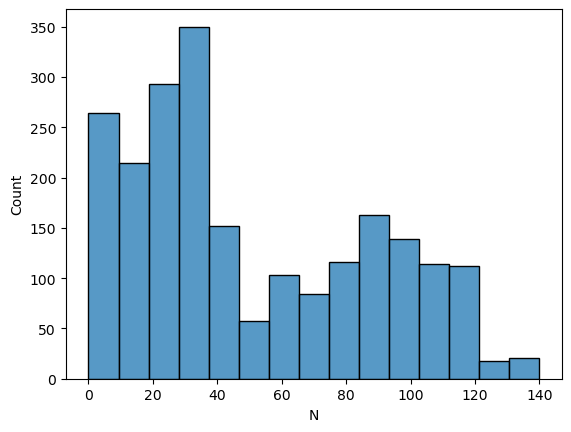

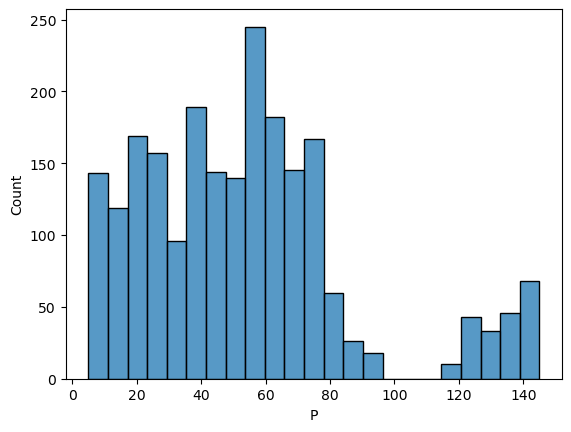

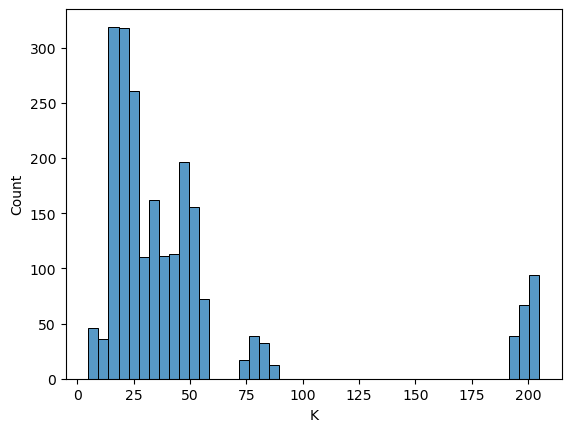

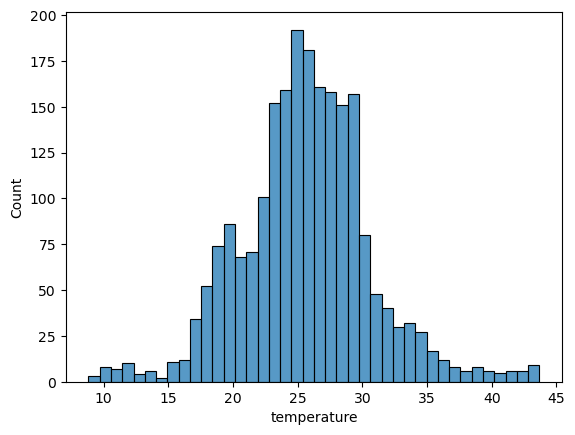

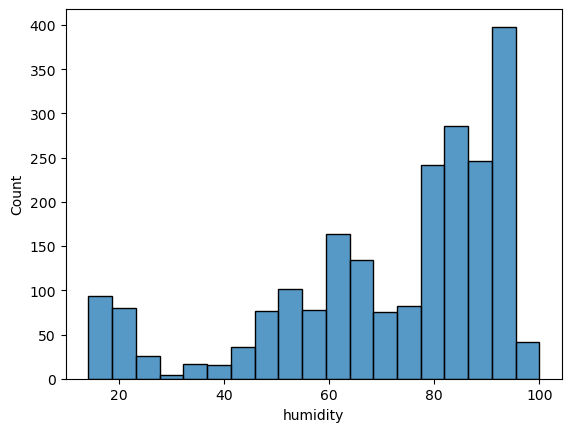

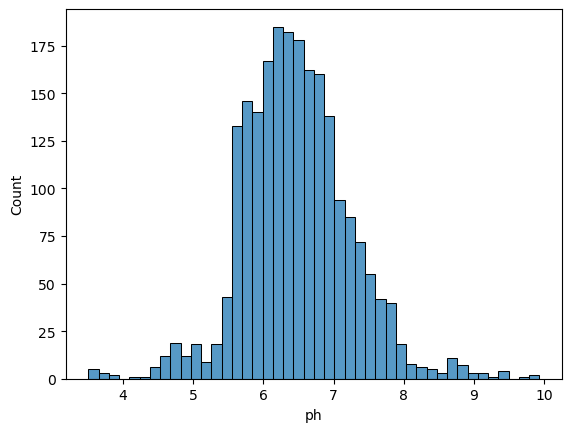

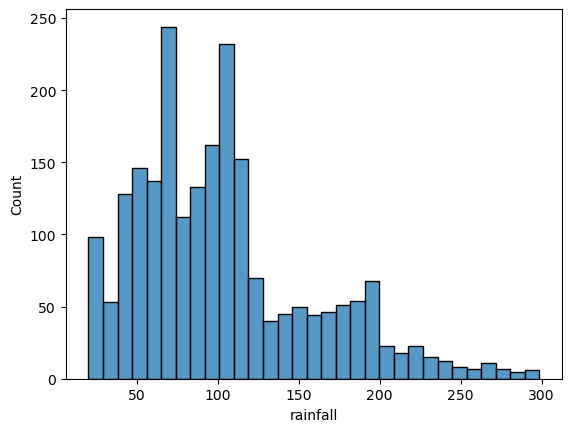

In [43]:
#histogram to understand the distribution
import seaborn as sns
from matplotlib import pyplot as plt
for i in data1.select_dtypes(include = ['number']).columns:
    sns.histplot(data = data1,x=i)
    plt.show()

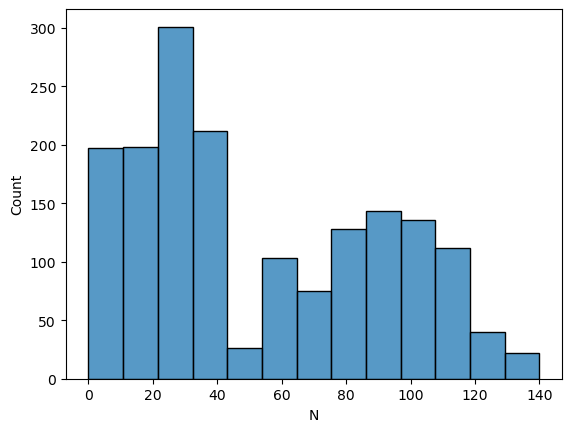

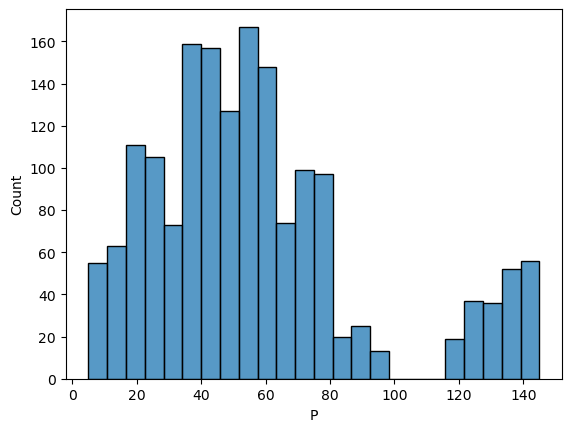

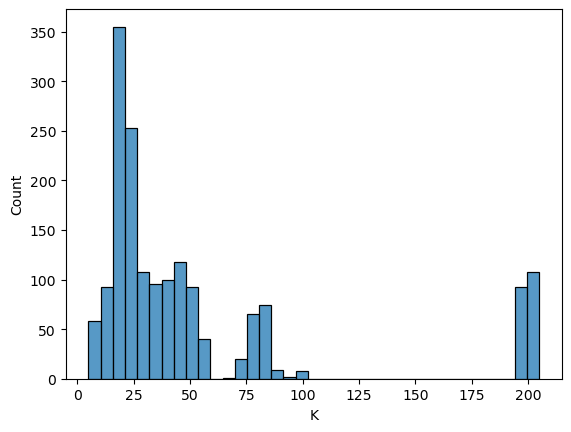

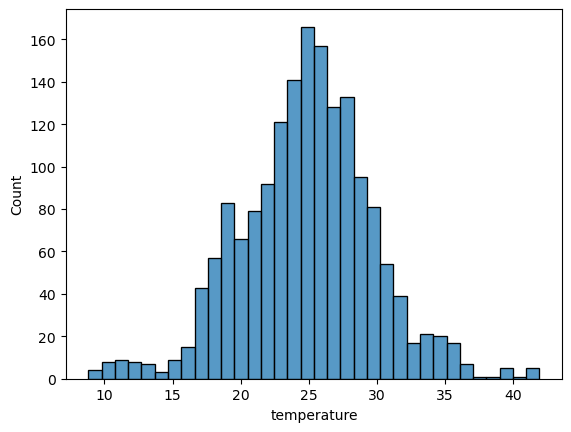

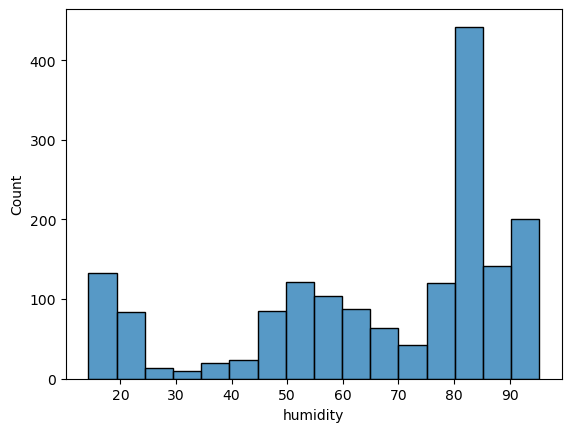

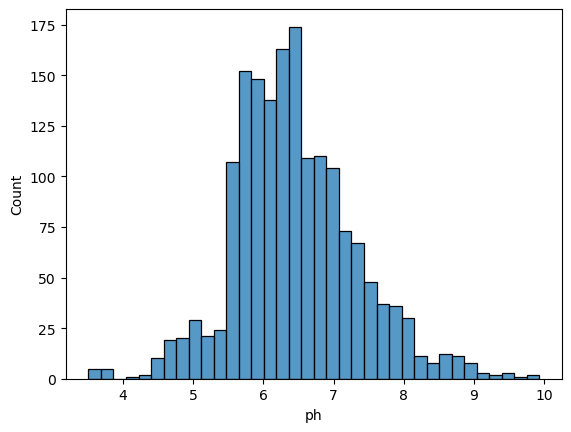

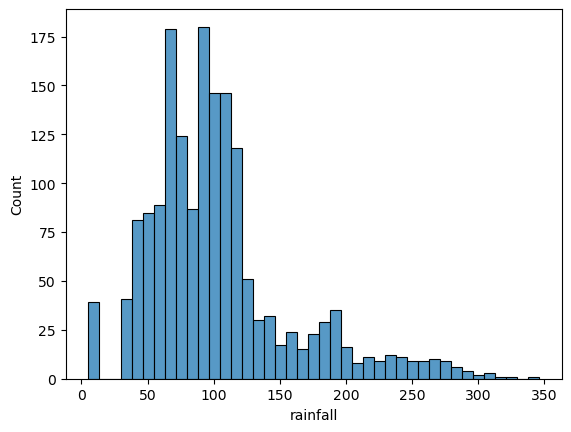

In [44]:
for i in data2.select_dtypes(include = 'number').columns:
    sns.histplot(data = data2,x=i)
    plt.show()

### Calculating Z-scores to check the outliers

In [46]:
from scipy import stats
import numpy as np
z_scores = stats.zscore(data1.select_dtypes(include=['number']))
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).any(axis=1)
data1_outliers = data1[outliers]
print(data1_outliers)

       N   P   K  temperature   humidity        ph    rainfall   label
6     69  55  38    22.708838  82.639414  5.700806  271.324860    rice
12    78  58  44    26.800796  80.886848  5.108682  284.436457    rice
16    85  38  41    21.587118  82.788371  6.249051  276.655246    rice
19    88  35  40    23.579436  83.587603  5.853932  291.298662    rice
26    97  59  43    26.359272  84.044036  6.286500  271.358614    rice
...   ..  ..  ..          ...        ...       ...         ...     ...
1758  40  49  47    42.933686  91.175675  6.501521  246.361327  papaya
1761  59  62  49    43.360515  93.351916  6.941497  114.778071  papaya
1766  63  58  50    43.037143  94.642890  6.720744   41.585659  papaya
1778  35  68  45    42.936054  90.094481  6.612430  234.846611  papaya
1797  35  67  49    41.313301  91.150880  6.617067  239.742755  papaya

[171 rows x 8 columns]


### function to check the quantile values for classifying outliers

In [48]:
def whisker(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3-q1
    lw = q1 - 1.5 * iqr
    uw = q1 + 1.5 * iqr
    return lw,uw


In [49]:
for i in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    lw,uw = whisker(data1[i])
    print(f'\t\t\tOutliers\n*****************************************************************************************')
    print(f'{i}-lower:{lw}\t\t{i}-upper:{uw}\n')
    # outliers = ((data1[i] < (lw)) | (data1[i] > (uw)))
    # data1_outliers = data1[outliers]
    # print(data1_outliers)

			Outliers
*****************************************************************************************
N-lower:-73.875		N-upper:115.875

			Outliers
*****************************************************************************************
P-lower:-32.0		P-upper:88.0

			Outliers
*****************************************************************************************
K-lower:-23.5		K-upper:63.5

			Outliers
*****************************************************************************************
temperature-lower:14.080955682499999		temperature-upper:31.457793582500003

			Outliers
*****************************************************************************************
humidity-lower:15.731725873750001		humidity-upper:104.79217973125

			Outliers
*****************************************************************************************
ph-lower:4.543768066249998		ph-upper:7.399617532250002

			Outliers
*************************************************************************************

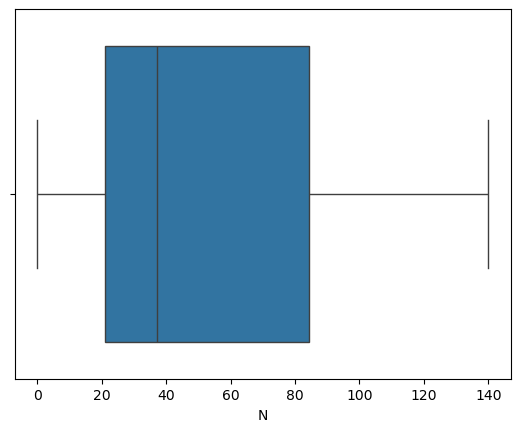

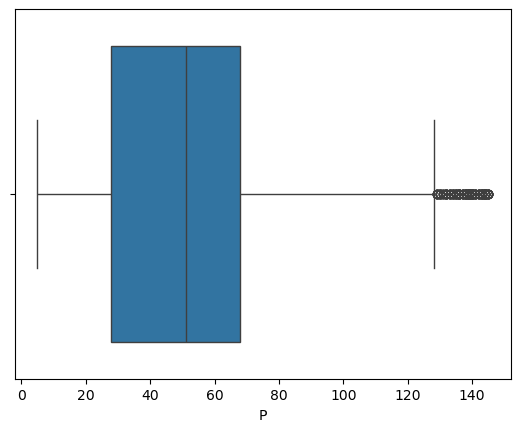

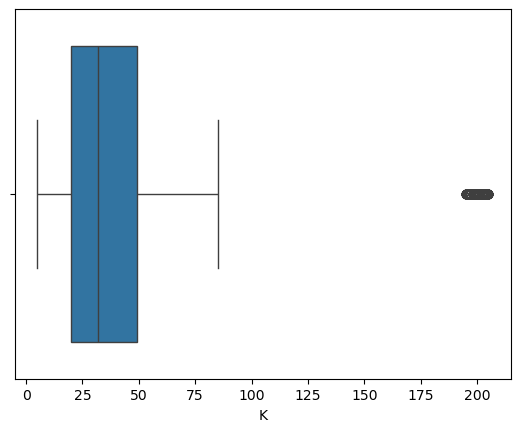

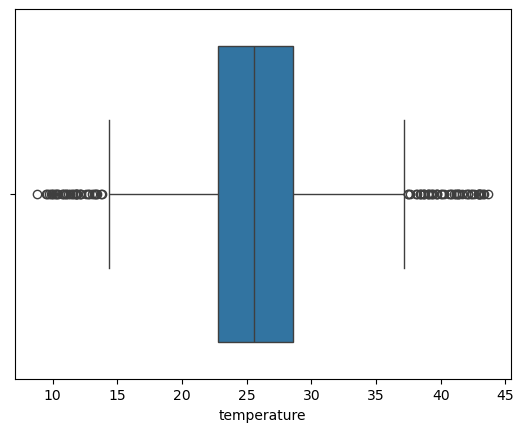

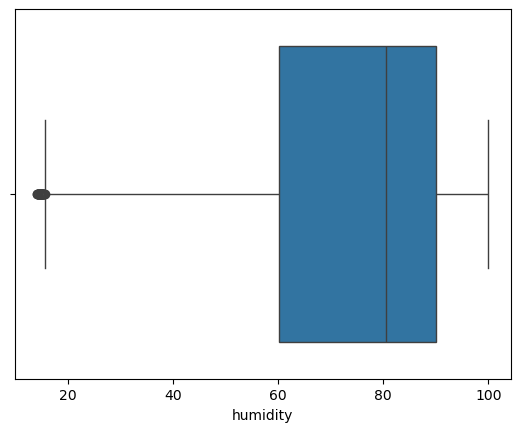

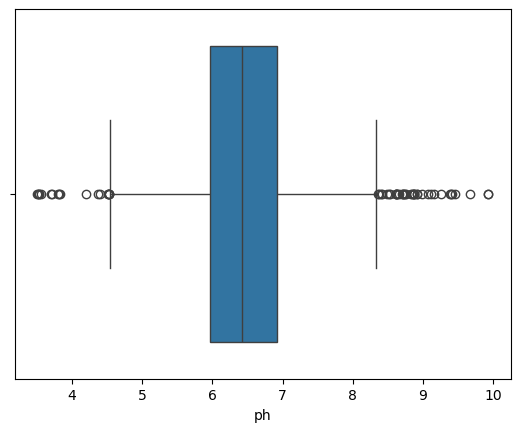

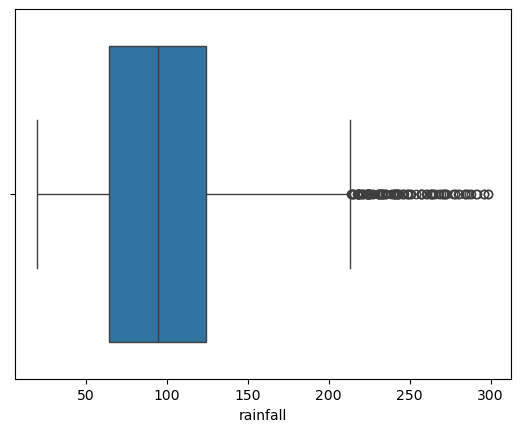

In [50]:
#box plot to identify the distribution and outliers
import seaborn as sns
from matplotlib import pyplot as plt
for i in data1.select_dtypes(include = ['number']).columns:
    sns.boxplot(data = data1,x=i)
    plt.show()

In [51]:
from scipy import stats
import numpy as np
z_scores = stats.zscore(data2.select_dtypes(include=['number']))
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).any(axis=1)
data2_outliers = data2[outliers]
print(data2_outliers)

       N   P   K  temperature   humidity        ph    rainfall      label
6     69  55  38    22.708838  82.639414  5.700806  271.324860       rice
12    78  58  44    26.800796  80.886848  5.108682  284.436457       rice
16    85  38  41    21.587118  82.788371  6.249051  276.655246       rice
19    88  35  40    23.579436  83.587603  5.853932  291.298662       rice
26    97  59  43    26.359272  84.044036  6.286500  271.358614       rice
...   ..  ..  ..          ...        ...       ...         ...        ...
1715  98  22  83    26.357653  82.477936  6.422285  318.180614   Arecanut
1717  97  27  89    27.005186  84.784360  7.199607  275.519913   Arecanut
1720  91  27  86    23.465145  82.096218  5.899593  307.440414   Arecanut
1730  58  49  89    27.663592  74.735938  6.695659  274.249224  Jackfruit
1739  49  31  75    26.544250  79.631016  7.403485  273.713418  Jackfruit

[66 rows x 8 columns]


In [52]:
for i in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    lw,uw = whisker(data2[i])
    print(f'\t\t\tOutliers\n*****************************************************************************************')
    print(f'{i}-lower:{lw}\t\t{i}-upper:{uw}\n')
    # outliers = ((data1[i] < (lw)) | (data1[i] > (uw)))
    # data1_outliers = data1[outliers]
    # print(data1_outliers)

			Outliers
*****************************************************************************************
N-lower:-78.5		N-upper:122.5

			Outliers
*****************************************************************************************
P-lower:-19.0		P-upper:89.0

			Outliers
*****************************************************************************************
K-lower:-29.5		K-upper:69.5

			Outliers
*****************************************************************************************
temperature-lower:13.143899725000002		temperature-upper:30.808035894999996

			Outliers
*****************************************************************************************
humidity-lower:4.494492014999999		humidity-upper:99.76029640499999

			Outliers
*****************************************************************************************
ph-lower:4.2441134919999985		ph-upper:7.484745568000001

			Outliers
***************************************************************************************

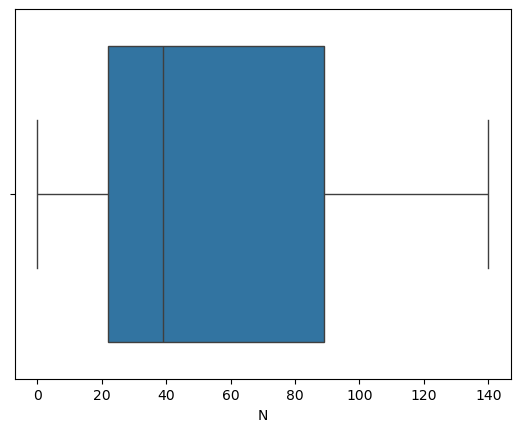

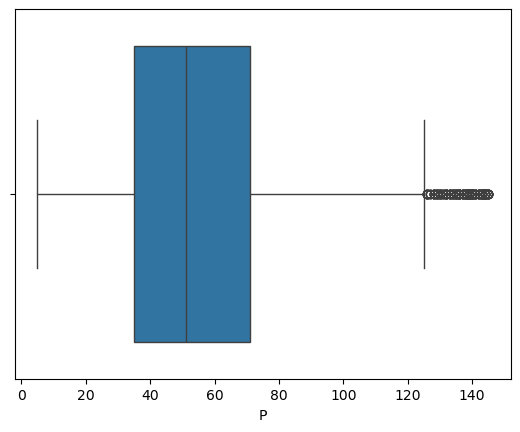

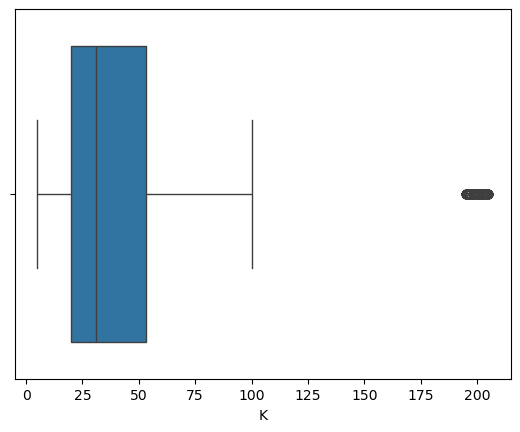

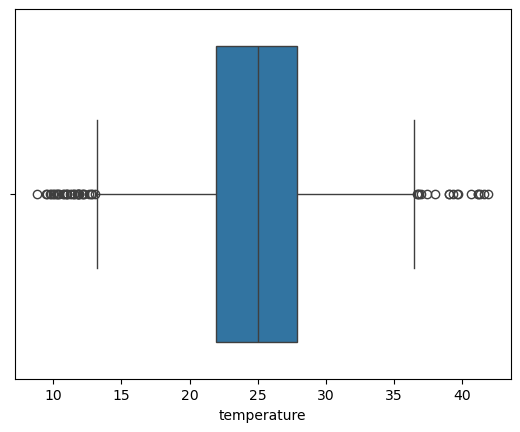

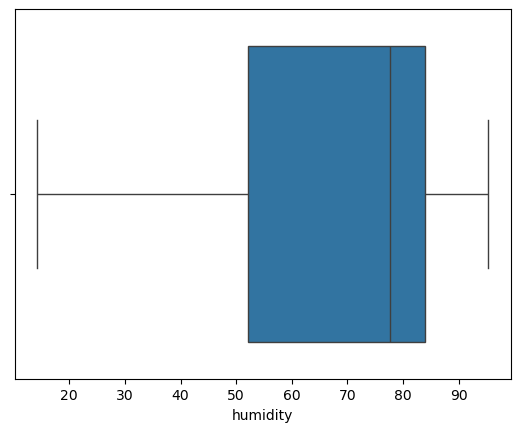

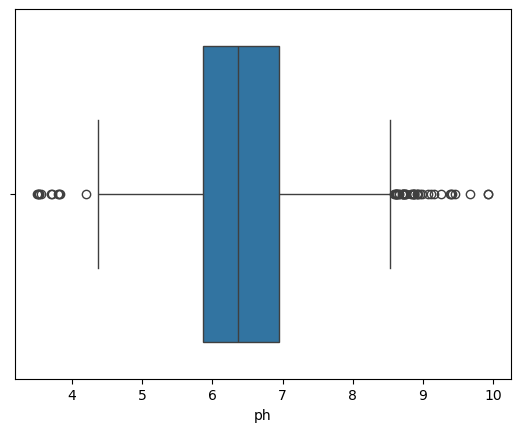

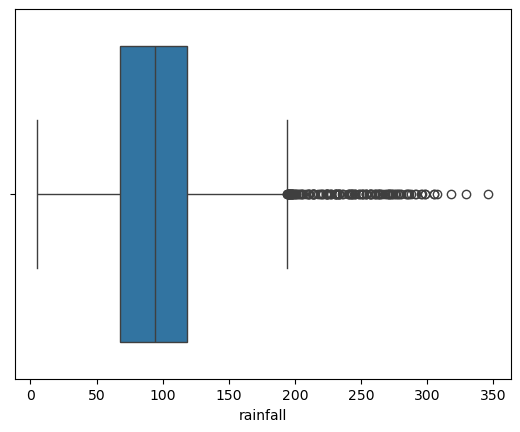

In [53]:
for i in data2.select_dtypes(include = 'number').columns:
    sns.boxplot(data = data2,x=i)
    plt.show()

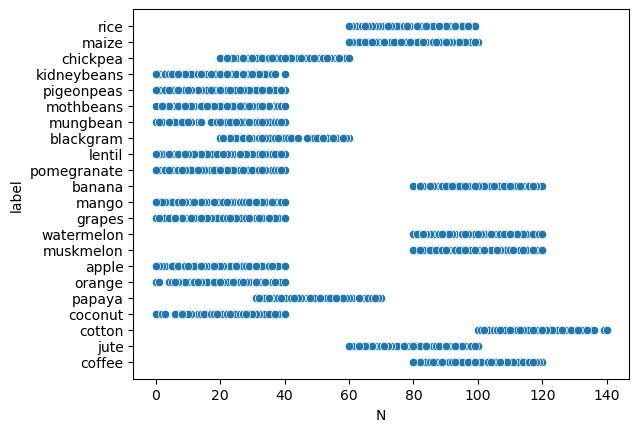

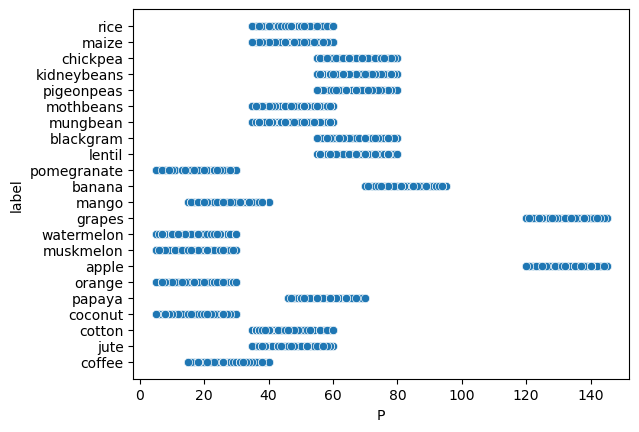

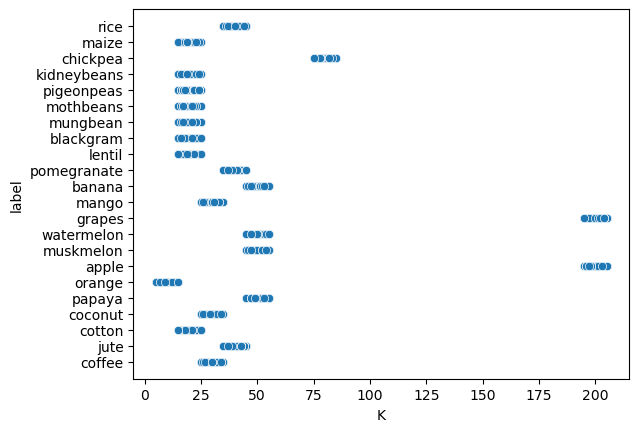

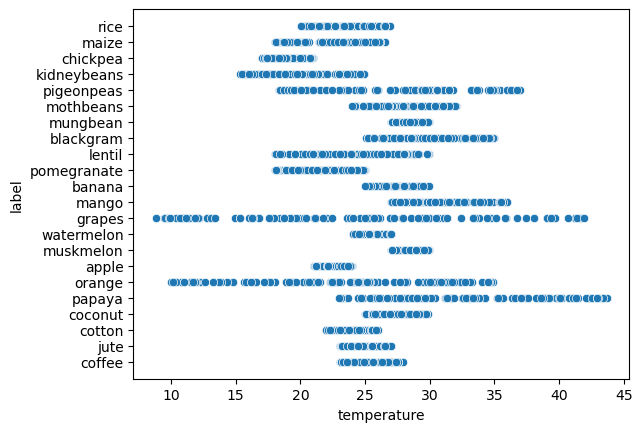

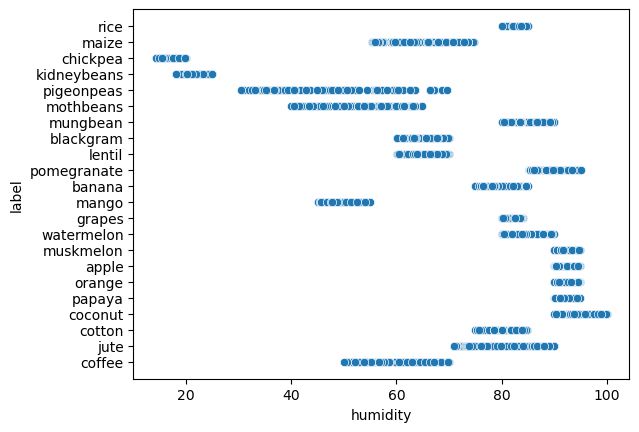

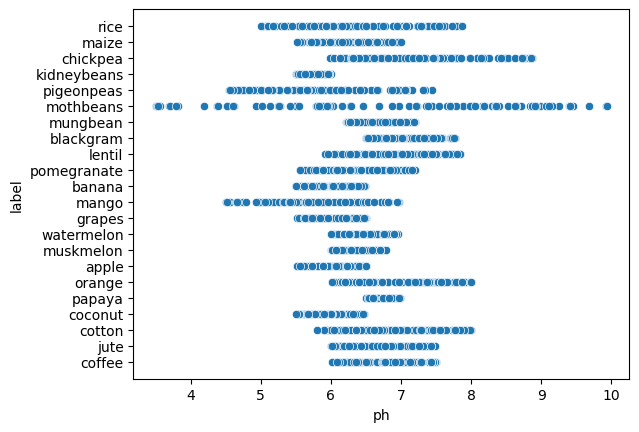

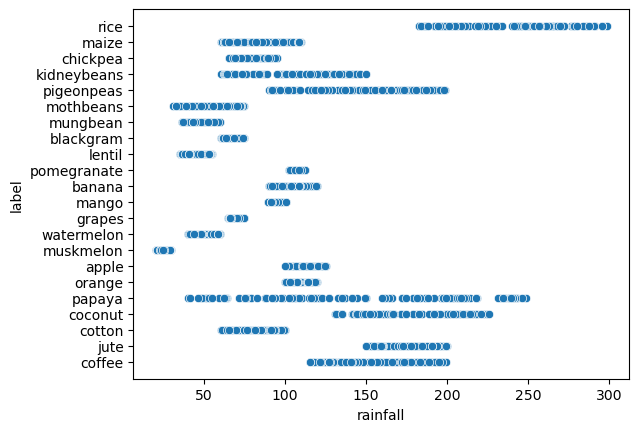

In [54]:
#scatter plot to understand the realationship between features and label
for i in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    sns.scatterplot(data = data1,x = i,y = 'label')
    plt.show()

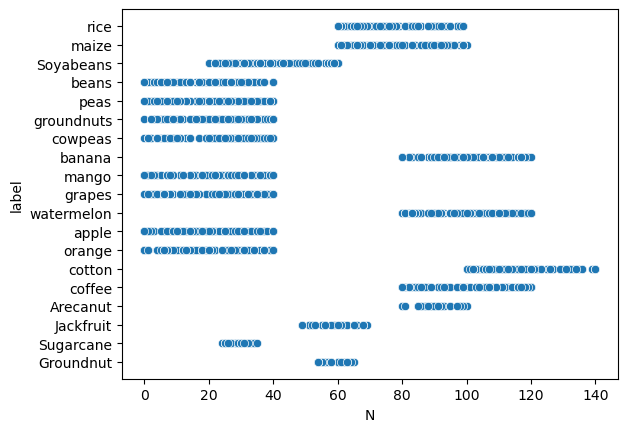

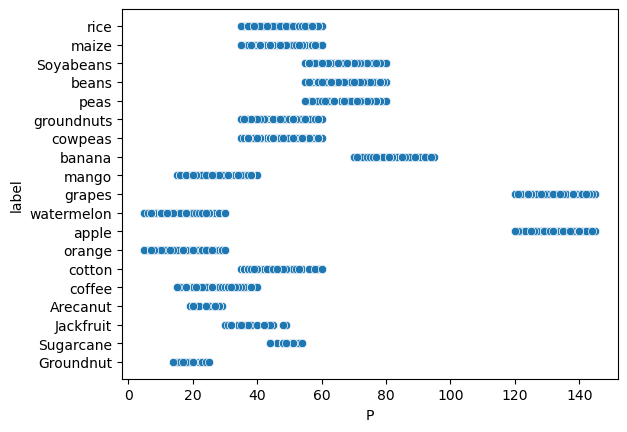

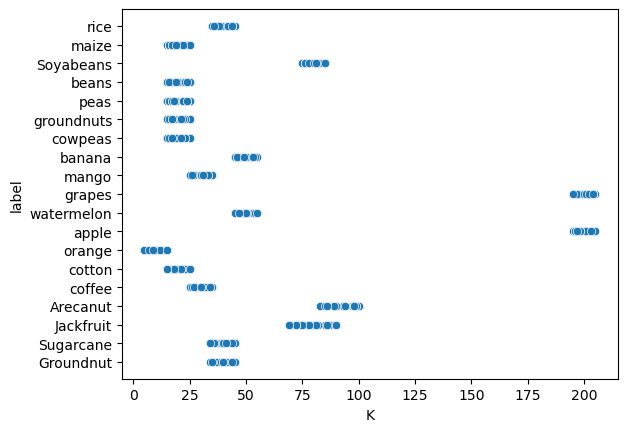

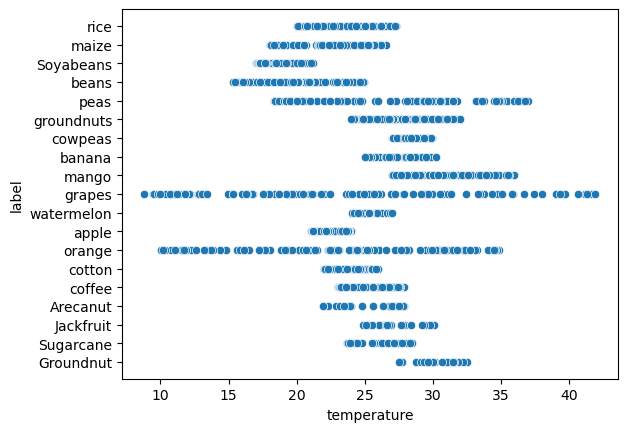

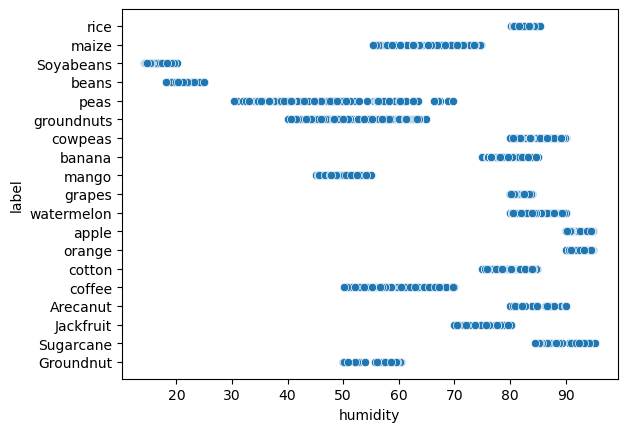

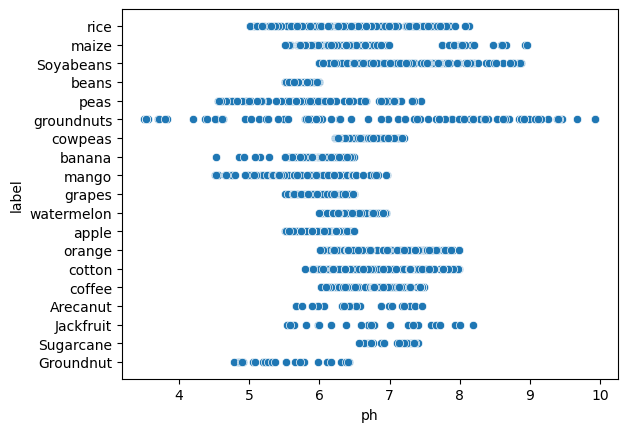

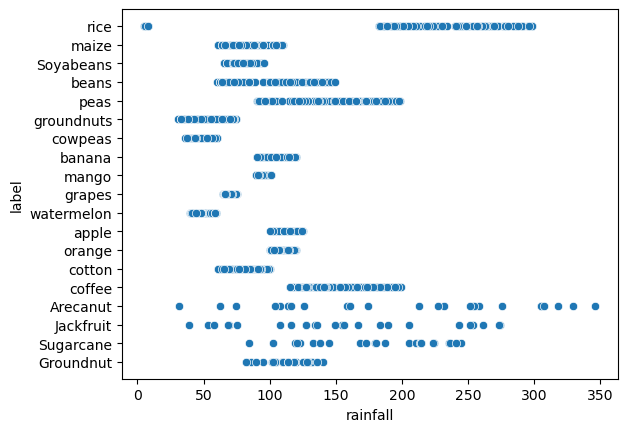

In [55]:
for i in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    sns.scatterplot(data = data2,x = i,y = 'label')
    plt.show()

In [56]:
#correlation with heatmap to interpret the relation and multicolliniarity
set1 = data1.select_dtypes(include = 'number').corr()

In [57]:
set1

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


Text(0.5, 1.0, 'correlation matrix')

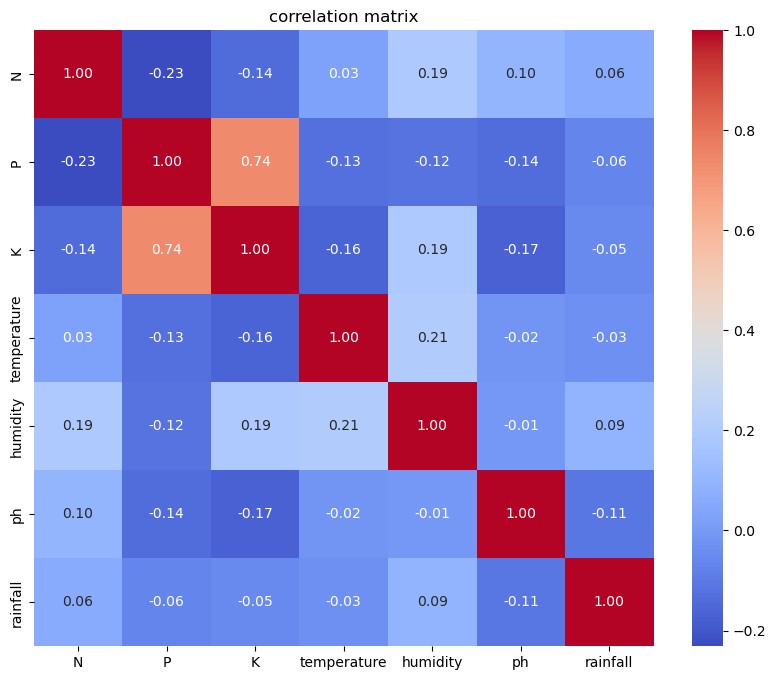

In [58]:
plt.figure(figsize = (10,8))
sns.heatmap(set1,annot=True,fmt='.2f',cmap = 'coolwarm')
plt.title('correlation matrix')

In [59]:
set2 = data2.select_dtypes(include = 'number').corr()

In [60]:
set2

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.289825,-0.214300,-0.008545,0.247683,0.119066,0.119478
P,-0.289825,1.000000,0.803088,-0.187071,0.038763,-0.219521,-0.060817
K,-0.214300,0.803088,1.000000,-0.169719,0.220605,-0.139086,-0.047388
temperature,-0.008545,-0.187071,-0.169719,1.000000,0.179388,-0.128819,-0.021486
humidity,0.247683,0.038763,0.220605,0.179388,1.000000,0.004336,0.047791
ph,0.119066,-0.219521,-0.139086,-0.128819,0.004336,1.000000,-0.069806
rainfall,0.119478,-0.060817,-0.047388,-0.021486,0.047791,-0.069806,1.000000


Text(0.5, 1.0, 'correlation matrix')

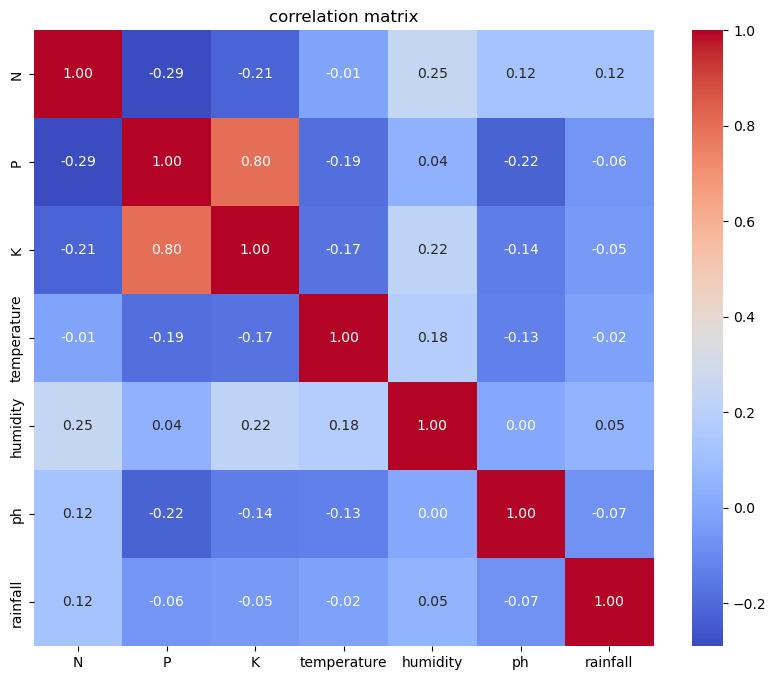

In [61]:
plt.figure(figsize = (10,8))
sns.heatmap(set2,annot=True,fmt='.2f',cmap = 'coolwarm')
plt.title('correlation matrix')

In [62]:
data1.select_dtypes(include = 'number').columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

In [63]:
data2.select_dtypes(include = 'number').columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

# Feature Engineering

we are merging multiple datasets for better training and performance of the model

In [66]:
# Merging datasets
import pandas as pd

df1 = pd.read_csv('datasets/Crop_data1.csv')
df1.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [67]:
df2 = pd.read_csv('datasets/crop_data2.csv')
df2.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [69]:
display(df1.shape,df2.shape)

(2200, 8)

(1796, 8)

In [70]:
merged_data = pd.concat([df1,df2],axis = 0)
merged_data.shape

(3996, 8)

In [71]:
merged_data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
1791,61,18,41,31.042050,50.181397,5.360749,128.902109,Groundnut
1792,58,24,45,27.527798,52.089167,4.895913,135.823036,Groundnut
1793,54,20,44,30.690720,50.919810,6.111688,128.034877,Groundnut
1794,54,17,40,31.492970,53.925175,5.519773,118.555197,Groundnut


In [72]:
# checking fro duplicated values
merged_data.duplicated().sum()

766

In [73]:
# checking for null values
merged_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [74]:
# Removing duplicates
merged_data.drop_duplicates(subset = ['N','P','K','temperature','humidity','ph','rainfall'],keep = 'first',inplace = True)

In [75]:
merged_data.duplicated().sum()

0

In [76]:
final_dataset = merged_data

In [77]:
final_dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
1791,61,18,41,31.042050,50.181397,5.360749,128.902109,Groundnut
1792,58,24,45,27.527798,52.089167,4.895913,135.823036,Groundnut
1793,54,20,44,30.690720,50.919810,6.111688,128.034877,Groundnut
1794,54,17,40,31.492970,53.925175,5.519773,118.555197,Groundnut


# Modelling process

In [79]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


In [84]:
#load the datasets
data = final_dataset

In [85]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
1791,61,18,41,31.042050,50.181397,5.360749,128.902109,Groundnut
1792,58,24,45,27.527798,52.089167,4.895913,135.823036,Groundnut
1793,54,20,44,30.690720,50.919810,6.111688,128.034877,Groundnut
1794,54,17,40,31.492970,53.925175,5.519773,118.555197,Groundnut


In [86]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2876 entries, 0 to 1795
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2876 non-null   int64  
 1   P            2876 non-null   int64  
 2   K            2876 non-null   int64  
 3   temperature  2876 non-null   float64
 4   humidity     2876 non-null   float64
 5   ph           2876 non-null   float64
 6   rainfall     2876 non-null   float64
 7   label        2876 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 202.2+ KB


In [88]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000
mean,52.197497,53.549026,49.601182,25.444739,70.530728,6.476797,104.620116
std,36.765191,32.755782,50.873974,4.963679,22.583588,0.787379,56.953432
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,5.314507
25%,22.000000,29.000000,21.000000,22.629467,58.252046,5.955711,65.486302
50%,39.000000,50.000000,34.000000,25.505294,80.236447,6.420873,95.426260
75%,86.000000,68.000000,50.000000,28.311933,88.154410,6.943050,126.726537
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,346.216891


In [89]:
data.shape

(2876, 8)

In [90]:
data.duplicated().sum()

0

In [91]:
# Selecting continuous numerical columns and the label
features = data.select_dtypes(include=[float, int]).columns
target = 'label'

In [92]:
# Splitting dataset as features and label
X = data[features]
y = data[target]

In [93]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
# Scaling the dataset using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [95]:
# X_train_scaled = pd.DataFrame(X_train_scaled, columns = features)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns = features)

In [96]:
display(X_train_scaled,X_test_scaled)

array([[ 1.75569716, -0.86406886,  0.07232829, ...,  0.94658981,
        -0.09774416, -1.39272408],
       [-0.79564966, -0.71090767, -0.1053593 , ...,  0.64957625,
        -0.47228425, -0.04196933],
       [-0.79564966, -0.98659782, -0.46073449, ...,  1.00535984,
        -0.76146703,  0.75277185],
       ...,
       [-1.12135351, -0.52711424, -0.36201916, ..., -0.84294151,
        -0.01805831, -0.08964486],
       [-1.12135351,  2.16852277,  3.05353125, ...,  0.41171045,
        -0.16611505, -0.58614935],
       [-0.55137177,  0.75943979, -0.53970675, ..., -0.37384814,
         0.67047674, -0.89569102]])

array([[-0.76850767, -0.3433208 , -0.51996369, ...,  0.5134083 ,
        -0.07944617, -1.05736638],
       [-0.46994581, -0.71090767, -0.30278996, ...,  1.09233095,
        -0.45060072,  1.32442906],
       [ 1.83712312, -1.01723006, -0.08561623, ...,  0.79458536,
        -0.48605577, -0.8816145 ],
       ...,
       [ 1.91854908, -0.43521752, -0.50022062, ...,  0.32802087,
         1.24824347, -0.33386047],
       [-0.76850767,  0.0548983 ,  0.56590494, ..., -2.46746512,
         0.20698524, -0.51427588],
       [-1.22992146, -1.2929202 , -0.34227609, ...,  1.07910072,
        -1.22688147,  1.36424514]])

In [97]:
# Model Initializing using Gaussian NaiveBayes algorithm
model = GaussianNB()
model.fit(X_train_scaled, y_train)

GaussianNB()

In [98]:
# Making predictions
y_pred = model.predict(X_test_scaled)

In [99]:
# Function to predict crop using scaeled data 
def predict_crop(features):
    features_df = pd.DataFrame([features], columns=features.keys())
    scaled_features = scaler.transform(features_df)
    prediction = model.predict(scaled_features)
    return prediction[0]


In [ ]:
#input features
features = {
    'N': input('enter Nitrogen value:'),
    'P': input('Enter Phosphorous values:'),
    'K': input('Enter Potassium value:'),
    'temperature': input('Enter the Temperature:'),
    'humidity': input('Enter the Humidity:'),
    'ph': input('Enter the pH value:'),
    'rainfall': input('Enter the Rainfall')
}
print('Naive Bayes Prediction:', predict_crop(features))

# Model Evaluation

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = merged_data

# Selecting continuous columns and the label
continuous_columns = df.select_dtypes(include=[float, int]).columns
label_column = 'label'

# Splitting features and label
X = df[continuous_columns]
y = df[label_column]

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the scaler
scaler = StandardScaler()

# Fitting the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# revertng the scaled array back to DataFrame to retain feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=continuous_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=continuous_columns)

# Model initializing using Gaussian Naive Bayes algorithm
model = GaussianNB()
model.fit(X_train_scaled, y_train)

# Predicting using the test data
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculating accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy*100}")
print(f"Test Accuracy: {test_accuracy*100}")

# Plot learning curves
train_sizes = np.linspace(0.1, 1.0, 10, endpoint=False)
train_scores = []
test_scores = []

for train_size in train_sizes:
    # Using only  portion of the training data
    X_train_partial, _, y_train_partial, _ = train_test_split(X_train_scaled, y_train, train_size=train_size, random_state=42)
    model.fit(X_train_partial, y_train_partial)
    train_scores.append(model.score(X_train_partial, y_train_partial))
    test_scores.append(model.score(X_test_scaled, y_test))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label='Training Score')
plt.plot(train_sizes, test_scores, label='Validation Score')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Training the model on training data
model.fit(X_train_scaled, y_train)

# Evaluating the model on training data
train_predictions = model.predict(X_train_scaled)
nb_train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Training Accuracy: {nb_train_accuracy*100}')

# Evaluating the model on testing data
test_predictions = model.predict(X_test_scaled)
nb_test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {nb_test_accuracy*100}')



In [ ]:
from sklearn.model_selection import cross_val_score

# Performing cross-validation for model optimization
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores*100}')
print(f'Mean CV Score: {cv_scores.mean()*100}')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train, cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='accuracy')

# Calculating mean and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')

plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.show()


In [ ]:
# Model Evaluation
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test,y_pred,average = 'weighted',zero_division=0)
recall = metrics.recall_score(y_test,y_pred,average = 'weighted')
f1 = metrics.f1_score(y_test,y_pred,average = 'weighted')
print(f'Model Accuracy: {accuracy * 100:.2f}%')
print(f'Precision Score: {precision * 100:.2f}%')
print(f'Recall Score: {recall * 100: .2f}%')
print(f'f1-score: {f1*100:.2f}%')

In [ ]:
cm = metrics.confusion_matrix(y_test,y_pred)
print(f'Confusion matrix:\n{cm}')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
cr = metrics.classification_report(y_test,y_pred,zero_division=0)
print(f'Classification Report:\n{cr}')


# Insights and Recommendations

In [ ]:
#training of data and checking libraries with more accuracy 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


#libraries used in dictionary format
models = {
    'Logistic Regression' : LogisticRegression(),
    'Naive Bayes' : GaussianNB(),
    'Support Vector Machine' : SVC(),
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Bagging' : BaggingClassifier(),
    'AdaBoost' : AdaBoostClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

#name = libraries/modulesnames, md = models dictionary and results will be assigned in items
for name,md in models.items():
    md.fit(X_train_scaled,y_train)
    ypred = md.predict(X_test_scaled)

    print(f"{name} with accuracy : {accuracy_score(y_test,ypred) * 100}")

# Modelling using SVM Classifier

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics


In [ ]:
# Load the dataset
data = final_dataset

In [ ]:
# Selecting continuous numerical columns and the label
features = data.select_dtypes(include=[float, int]).columns
target = 'label'

In [ ]:
# Splitting dataset into features and label
X = data[features]
y = data[target]

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scaling the dataset using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# model initializing using svm classifier
model = SVC(kernel='linear', random_state=42)  
model.fit(X_train_scaled, y_train)

In [ ]:
# Making predictions
y_pred = model.predict(X_test_scaled)

In [ ]:
# Function to predict crop recommendation 
def predict_crop(features):
    features_df = pd.DataFrame([features], columns=features.keys())
    scaled_features = scaler.transform(features_df)
    prediction = model.predict(scaled_features)
    return prediction[0]


In [ ]:
#input features
features = {
    'N': input('enter Nitrogen value:'),
    'P': input('Enter Phosphorous values:'),
    'K': input('Enter Potassium value:'),
    'temperature': input('Enter the Temperature:'),
    'humidity': input('Enter the Humidity:'),
    'ph': input('Enter the pH value:'),
    'rainfall': input('Enter the Rainfall')
}
print('Naive Bayes Prediction:', predict_crop(features))

# SVM Classifier Evaluation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = merged_data

# Selecting continuous columns and the label
continuous_columns = df.select_dtypes(include=[float, int]).columns
label_column = 'label'

# Splitting features and label
X = df[continuous_columns]
y = df[label_column]

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the scaler
scaler = StandardScaler()

# Fitting the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# reverting back to DataFrame to retain feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=continuous_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=continuous_columns)

# Initializing and train the Naive Bayes Classifier
model = SVC()
model.fit(X_train_scaled, y_train)

# Predicting using the test data
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculating accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy*100}")
print(f"Test Accuracy: {test_accuracy*100}")

# Plottting learning curves
train_sizes = np.linspace(0.1, 1.0, 10, endpoint=False)
train_scores = []
test_scores = []

for train_size in train_sizes:
    # Using a portion of the training data
    X_train_partial, _, y_train_partial, _ = train_test_split(X_train_scaled, y_train, train_size=train_size, random_state=42)
    model.fit(X_train_partial, y_train_partial)
    train_scores.append(model.score(X_train_partial, y_train_partial))
    test_scores.append(model.score(X_test_scaled, y_test))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label='Training Score')
plt.plot(train_sizes, test_scores, label='Validation Score')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Training the model on training data
model.fit(X_train_scaled, y_train)

# Evaluating the model on training data
train_predictions =model.predict(X_train_scaled)
svm_train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Training Accuracy: {svm_train_accuracy*100}')

# Evaluating the model on test data
test_predictions = model.predict(X_test_scaled)
svm_test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {svm_test_accuracy*100}')



In [ ]:
from sklearn.model_selection import cross_val_score

# Performing cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores*100}')
print(f'Mean CV Score: {cv_scores.mean()*100}')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train, cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='accuracy')

# Calculating mean and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')

plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.show()


In [ ]:
# Model Evaluation
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test,y_pred,average = 'weighted',zero_division=0)
recall = metrics.recall_score(y_test,y_pred,average = 'weighted')
f1 = metrics.f1_score(y_test,y_pred,average = 'weighted')
print(f'Model Accuracy: {accuracy * 100:.2f}%')
print(f'Precision Score: {precision * 100:.2f}%')
print(f'Recall Score: {recall * 100: .2f}%')
print(f'f1-score: {f1*100:.2f}%')

In [ ]:
cm = metrics.confusion_matrix(y_test,y_pred)
print(f'Confusion matrix:\n{cm}')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
cr = metrics.classification_report(y_test,y_pred,zero_division=0)
print(f'Classification Report:\n{cr}')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = merged_data

# Select continuous columns and the label
continuous_columns = df.select_dtypes(include=[float, int]).columns
label_column = 'label'

# Split features and label
X = df[continuous_columns]
y = df[label_column]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Convert back to DataFrame to retain feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=continuous_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=continuous_columns)

# Initialize and train the SVM Classifier
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train_scaled, y_train)

# Predict using the SVM model
y_train_pred_svm = svm_clf.predict(X_train_scaled)
y_test_pred_svm = svm_clf.predict(X_test_scaled)

# Calculate SVM accuracy
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

print(f"SVM Training Accuracy: {train_accuracy_svm}")
print(f"SVM Test Accuracy: {test_accuracy_svm}")

# Initialize and train the Naive Bayes Classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train_scaled, y_train)

# Predict using the Naive Bayes model
y_train_pred_nb = nb_clf.predict(X_train_scaled)
y_test_pred_nb = nb_clf.predict(X_test_scaled)

# Calculate Naive Bayes accuracy
train_accuracy_nb = accuracy_score(y_train, y_train_pred_nb)
test_accuracy_nb = accuracy_score(y_test, y_test_pred_nb)

print(f"Naive Bayes Training Accuracy: {train_accuracy_nb}")
print(f"Naive Bayes Test Accuracy: {test_accuracy_nb}")

# Plotting the accuracies
labels = ['SVM', 'Naive Bayes']
train_accuracies = [train_accuracy_svm, train_accuracy_nb]
test_accuracies = [test_accuracy_svm, test_accuracy_nb]

x = np.arange(len(labels))  # the label locations
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Training Accuracy')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison between SVM and Naive Bayes')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = merged_data

# Select continuous columns and the label
continuous_columns = df.select_dtypes(include=[float, int]).columns
label_column = 'label'

# Split features and label
X = df[continuous_columns]
y = df[label_column]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Convert back to DataFrame to retain feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=continuous_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=continuous_columns)

# Initialize and train the SVM Classifier
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train_scaled, y_train)

# Predict using the SVM model
y_train_pred_svm = svm_clf.predict(X_train_scaled)
y_test_pred_svm = svm_clf.predict(X_test_scaled)

# Calculate SVM accuracy
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

print(f"SVM Training Accuracy: {train_accuracy_svm}")
print(f"SVM Test Accuracy: {test_accuracy_svm}")

# Initialize and train the Naive Bayes Classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train_scaled, y_train)

# Predict using the Naive Bayes model
y_train_pred_nb = nb_clf.predict(X_train_scaled)
y_test_pred_nb = nb_clf.predict(X_test_scaled)

# Calculate Naive Bayes accuracy
train_accuracy_nb = accuracy_score(y_train, y_train_pred_nb)
test_accuracy_nb = accuracy_score(y_test, y_test_pred_nb)

print(f"Naive Bayes Training Accuracy: {train_accuracy_nb}")
print(f"Naive Bayes Test Accuracy: {test_accuracy_nb}")

# Plotting the accuracies as points
models = ['SVM', 'Naive Bayes']
train_accuracies = [train_accuracy_svm, train_accuracy_nb]
test_accuracies = [test_accuracy_svm, test_accuracy_nb]

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(models, train_accuracies, 'o-', label='Training Accuracy', color='blue')
plt.plot(models, test_accuracies, 'o-', label='Test Accuracy', color='red')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between SVM and Naive Bayes')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Bar chart for accuracies
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(models))
width = 0.35

rects1 = ax.bar(x - width/2, train_accuracies, width, label='Training Accuracy', color='blue')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy', color='red')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison between SVM and Naive Bayes')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Attach a text label above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()


# Thank you

In [ ]:
!pip install joblib

In [ ]:
import joblib


In [ ]:
joblib.dump(model, 'crop recommendation model')


In [ ]:
loaded_model = joblib.load('crop recommendation model')
